## 4.4.2 Modelltraining mit erweitertem Datensatz

Dieses Notebook verwendet den erweiterten Datensatz mit 120 Anfragen, um ein verbessertes Klassifikationsmodell zu trainieren. Ziel ist es, die Auswirkungen stilistischer Variation auf die Modellgüte zu untersuchen.

In [1]:
# Daten laden und vorbereiten
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Neuer, erweiterter Datensatz
df = pd.read_csv("../data/augmented/buergeranfragen_augmented.csv", sep=";")

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

texts_clean = df["anfrage"].apply(clean_text)
labels = df["kategorie"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_clean)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Vergleich: Naive Bayes auf erweitertem Datensatz
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Accuracy (Naive Bayes, erweiterter Datensatz):", accuracy_score(y_test, y_pred_nb))
print("\nKlassifikationsbericht (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Accuracy (Naive Bayes, erweiterter Datensatz): 0.2916666666666667

Klassifikationsbericht (Naive Bayes):
               precision    recall  f1-score   support

       Abfall       0.67      0.40      0.50         5
          Bau       0.00      0.00      0.00         3
    Dokumente       0.20      0.33      0.25         3
Infrastruktur       0.50      0.60      0.55         5
    Sonstiges       0.00      0.00      0.00         3
      Verkehr       0.33      0.20      0.25         5

     accuracy                           0.29        24
    macro avg       0.28      0.26      0.26        24
 weighted avg       0.34      0.29      0.30        24



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_nb))
print("\nKlassifikationsbericht:")
print(classification_report(y_test, y_pred_nb))


In [2]:
# Modelltraining mit Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nKlassifikationsbericht:")
print(classification_report(y_test, y_pred))


Accuracy: 0.2916666666666667

Klassifikationsbericht:
               precision    recall  f1-score   support

       Abfall       0.67      0.40      0.50         5
          Bau       0.00      0.00      0.00         3
    Dokumente       0.20      0.33      0.25         3
Infrastruktur       0.38      0.60      0.46         5
    Sonstiges       0.00      0.00      0.00         3
      Verkehr       0.33      0.20      0.25         5

     accuracy                           0.29        24
    macro avg       0.26      0.26      0.24        24
 weighted avg       0.31      0.29      0.28        24



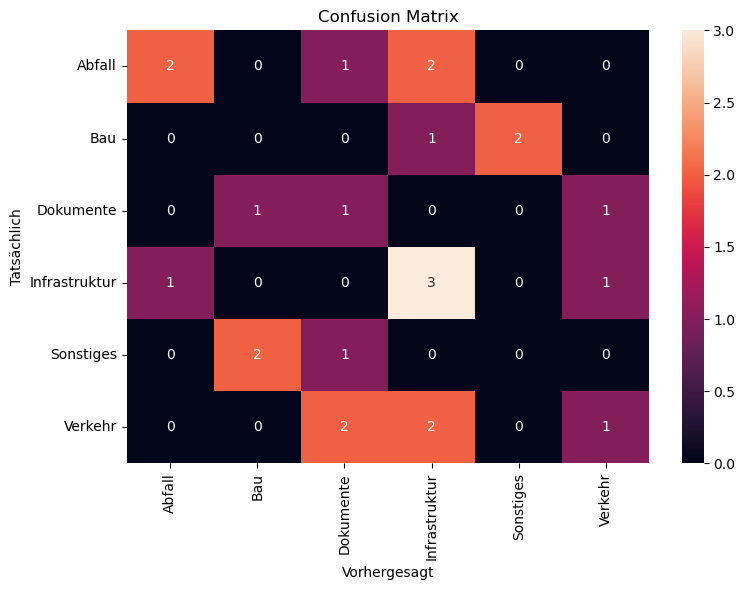

In [3]:
# Confusion Matrix visualisieren
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


## 4.4.3 - Logistic Regression mit nltk-Stoppwörtern

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk


nltk.download("stopwords")
from nltk.corpus import stopwords

# NLTK-Stoppwörter laden
stop_words_nltk = stopwords.words("german")

# TF-IDF mit nltk-Stoppwörtern
vectorizer_nltk = TfidfVectorizer(stop_words=stop_words_nltk)
X_nltk = vectorizer_nltk.fit_transform(texts_clean)

# Split + Modelltraining
X_train_nltk, X_test_nltk, y_train_nltk, y_test_nltk = train_test_split(X_nltk, y, test_size=0.2, random_state=42)
model_nltk = LogisticRegression(max_iter=1000)
model_nltk.fit(X_train_nltk, y_train_nltk)
y_pred_nltk = model_nltk.predict(X_test_nltk)

# Ergebnisse
print("Accuracy (mit nltk-Stoppwörtern):", accuracy_score(y_test_nltk, y_pred_nltk))
print("\nKlassifikationsbericht:")
print(classification_report(y_test_nltk, y_pred_nltk))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mariu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'texts_clean' is not defined

## 4.4.3 – Logistic Regression mit spaCy-Lemmatisierung

In [12]:
import spacy

# spaCy deutsches Modell laden
try:
    nlp = spacy.load("de_core_news_sm")
except:
    from spacy.cli import download
    download("de_core_news_sm")
    nlp = spacy.load("de_core_news_sm")

# Lemmatisierungsfunktion mit spaCy
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Texte lemmatisieren
texts_lemmatized = df["anfrage"].apply(lemmatize_text)

# TF-IDF Vektorisierung
vectorizer_spacy = TfidfVectorizer()
X_spacy = vectorizer_spacy.fit_transform(texts_lemmatized)

# Training/Test Split + Modell
X_train_spacy, X_test_spacy, y_train_spacy, y_test_spacy = train_test_split(X_spacy, y, test_size=0.2, random_state=42)
model_spacy = LogisticRegression(max_iter=1000)
model_spacy.fit(X_train_spacy, y_train_spacy)
y_pred_spacy = model_spacy.predict(X_test_spacy)

# Ergebnis
print("Accuracy (mit spaCy-Lemmatisierung):", accuracy_score(y_test_spacy, y_pred_spacy))
print("\nKlassifikationsbericht:")
print(classification_report(y_test_spacy, y_pred_spacy))


ModuleNotFoundError: No module named 'spacy'